### [Wine Quality Dataset 분석]
* 와인 품질 예측 모델 만들기
* 데이터 출처 : https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?select=WineQT.csv

#### 대회 개요
* 데이터 세트는 와인에 존재하는 다양한 화학 물질의 양과 와인 품질에 미치는 영향을 설명. 이 데이터로 분류 또는 회귀 문제를 생각해 볼 수 있음.

#### 미션 : 주어진 데이터를 이용하여 와인의 품질을 예측하기.

#### 데이터 설명
    1 - fixed acidity (고정 산도)
    2 - volatile acidity (휘발성 산도)
    3 - citric acid (구연산)
    4 - residual sugar (잔류 설탕) 
    5 - chlorides (염화물) 
    6 - free sulfur dioxide (유리 이산화황) 
    7 - total sulfur dioxide (총 이산화황) 
    8 - density (밀도) 
    9 - pH\ (pH)
    10 - sulphates (황산염) 
    11 - alcohol (알코올)

#### 라이브러리 불러오기

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
dat = pd.read_csv("./data/WineQT/WineQT.csv")

dat.shape

(1143, 13)

In [4]:
dat.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
dat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


* 결측치 없음.
* target columns : quality

In [7]:
dat.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
dat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


##### 우선 세개의 특징(변수)을 잡아서, quality를 예측하는 모델을 만들어보자.
     01 우선 데이터를 나누고,
     02 모델을 선택 및 학습하고, 이를 토대로 자체 평가를 토대로 모델 최종 선택
     03 마지막 선택된 모델로 test의 데이터로 quality를 예측하고 제출

#### 01 데이터 나누기

In [9]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

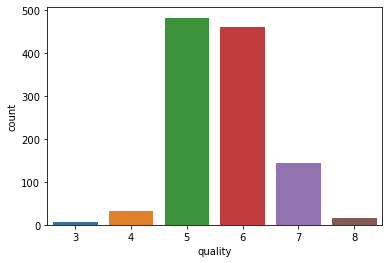

In [10]:
sns.countplot(dat['quality'])

In [11]:
# 우선 결측치 처리된 컬럼을 이용해 보자.
sel = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']

X = dat[sel]
y = dat['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state = 0)

X_train.shape, X_test.shape

((800, 4), (343, 4))

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
print("학습용 정확도 : ", model1.score(X_train,y_train) )
print("테스트용 정확도 : ", model1.score(X_test,y_test) )

model2 = DecisionTreeClassifier(max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print("학습용 정확도 : ", model2.score(X_train,y_train) )
print("테스트용 정확도 : ", model2.score(X_test,y_test) )

model3 = RandomForestClassifier(max_depth=3, random_state=0)
model3.fit(X_train, y_train)
print("학습용 정확도 : ", model3.score(X_train,y_train) )
print("테스트용 정확도 : ", model3.score(X_test,y_test) )

학습용 정확도 :  0.655
테스트용 정확도 :  0.5131195335276968
학습용 정확도 :  0.53125
테스트용 정확도 :  0.5160349854227405
학습용 정확도 :  0.52125
테스트용 정확도 :  0.5335276967930029


##### 성능이 가장 좋은 모델은 현재 RandomForestClassifier이다.

In [14]:
depth_num = range(1, 10)

for num in depth_num:
    model1 = RandomForestClassifier(max_depth=num, random_state=0)
    model1.fit(X_train, y_train)
    
    print("max_depth : ", num)
    print("학습용 정확도 : ", model1.score(X_train,y_train) )
    print("테스트용 정확도 : ", model1.score(X_test,y_test) )

max_depth :  1
학습용 정확도 :  0.49625
테스트용 정확도 :  0.5189504373177842
max_depth :  2
학습용 정확도 :  0.505
테스트용 정확도 :  0.5189504373177842
max_depth :  3
학습용 정확도 :  0.52125
테스트용 정확도 :  0.5335276967930029
max_depth :  4
학습용 정확도 :  0.56375
테스트용 정확도 :  0.5451895043731778
max_depth :  5
학습용 정확도 :  0.63875
테스트용 정확도 :  0.5830903790087464
max_depth :  6
학습용 정확도 :  0.705
테스트용 정확도 :  0.5889212827988338
max_depth :  7
학습용 정확도 :  0.76875
테스트용 정확도 :  0.6064139941690962
max_depth :  8
학습용 정확도 :  0.835
테스트용 정확도 :  0.6122448979591837
max_depth :  9
학습용 정확도 :  0.885
테스트용 정확도 :  0.5947521865889213


##### 과대적합도 어느정도 고려하여 max_depth가 7일때를 선택

In [15]:
# 트리의 개수를 조정해 보기
tree_num = [100, 300, 500, 1000]

for num in tree_num:
    model1 = RandomForestClassifier(max_depth=7, random_state=0, n_estimators= num)
    model1.fit(X_train, y_train)
    
    print("tree의 개수 : ", num)
    print("학습용 정확도 : ", model1.score(X_train,y_train) )
    print("테스트용 정확도 : ", model1.score(X_test,y_test) )

tree의 개수 :  100
학습용 정확도 :  0.76875
테스트용 정확도 :  0.6064139941690962
tree의 개수 :  300
학습용 정확도 :  0.77375
테스트용 정확도 :  0.6064139941690962
tree의 개수 :  500
학습용 정확도 :  0.7775
테스트용 정확도 :  0.6122448979591837
tree의 개수 :  1000
학습용 정확도 :  0.77875
테스트용 정확도 :  0.6005830903790087


In [16]:
# max_depth = 7, tree의 개수가 500일때 가장 좋다.

model1 = RandomForestClassifier(max_depth=7, random_state=0, n_estimators= 500)
model1.fit(X_train, y_train)
print("학습용 정확도 : ", model1.score(X_train,y_train) )
print("테스트용 정확도 : ", model1.score(X_test,y_test) )

학습용 정확도 :  0.7775
테스트용 정확도 :  0.6122448979591837


### 최종 예측 모델 성능 학습용 77.7%, 테스트용 61.2%로 확인